# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

from unityagents import UnityEnvironment
from collections import deque
from itertools import count
import datetime

from ddpg import DDPG, ReplayBuffer,BUFFER_SIZE,BATCH_SIZE,NUM_UPDATES,UPDATE_EVERY, MA_DDPG

%load_ext autoreload
%autoreload 2
%matplotlib inline

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
#agent = MA_DDPG(24,2,2,random_seed=23,CER=False)

In [6]:
def train_maddpg(num_steps=8000, CER=False):
    agent = MA_DDPG(24,2,2,random_seed=23,CER=CER)
    if(CER):
        f= open("scores_CER.txt","a+")
    else:
        f= open("scores.txt","a+")
    # Collect experience with pure random exploration
    scores_agent = deque(maxlen=100)  # last 100 scores
    print_every=25
    my_scores=[]
    for i in range(1,num_steps):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment   
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:            
            actions=agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            agent.step(states, actions, rewards,next_states, dones)
            if np.any(dones):                                  # exit loop if episode finished
                break
            states = next_states  
        new_score = np.max(scores)
        f.write("%s\n" % new_score)
        my_scores.append(new_score)
        scores_agent.append(new_score)

        if(np.mean(scores_agent)>0.5):
            print('Environment Solved in {} episodes!'.format(i-100))
            agent.save()
            break
        if (i%print_every==0):
            print('Ep. {} : Av score (max over agents) over 100 last episodes {}'.format(i, np.mean(scores_agent)))
            #agent.save()
    f.close()
    return my_scores

Ep. 25 : Av score (max over agents) over 100 last episodes 0.0
Ep. 50 : Av score (max over agents) over 100 last episodes 0.0020000000298023225
Ep. 75 : Av score (max over agents) over 100 last episodes 0.0026666667064030964
Ep. 100 : Av score (max over agents) over 100 last episodes 0.0030000000447034836
Ep. 125 : Av score (max over agents) over 100 last episodes 0.00570000009611249
Ep. 150 : Av score (max over agents) over 100 last episodes 0.006600000113248825
Ep. 175 : Av score (max over agents) over 100 last episodes 0.009200000166893006
Ep. 200 : Av score (max over agents) over 100 last episodes 0.008200000151991843
Ep. 225 : Av score (max over agents) over 100 last episodes 0.009300000164657832
Ep. 250 : Av score (max over agents) over 100 last episodes 0.01220000021159649
Ep. 275 : Av score (max over agents) over 100 last episodes 0.017400000281631946
Ep. 300 : Av score (max over agents) over 100 last episodes 0.029000000469386576
Ep. 325 : Av score (max over agents) over 100 l

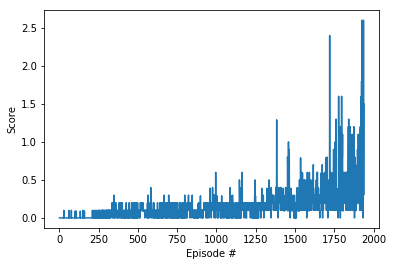

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = train_maddpg(CER=False)

plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
scores_CER = train_maddpg(CER=True)

plt.plot(np.arange(1, len(scores_CER)+1), scores_CER)
plt.ylabel('Score_CER')
plt.xlabel('Episode #')
plt.show()

Ep. 25 : Av score (max over agents) over 100 last episodes 0.004000000059604645
Ep. 50 : Av score (max over agents) over 100 last episodes 0.005800000093877315
Ep. 75 : Av score (max over agents) over 100 last episodes 0.005200000082453092
Ep. 100 : Av score (max over agents) over 100 last episodes 0.006900000106543303
Ep. 125 : Av score (max over agents) over 100 last episodes 0.009900000151246787
Ep. 150 : Av score (max over agents) over 100 last episodes 0.009000000134110451
Ep. 175 : Av score (max over agents) over 100 last episodes 0.015000000223517418
Ep. 200 : Av score (max over agents) over 100 last episodes 0.01700000025331974
Ep. 225 : Av score (max over agents) over 100 last episodes 0.020000000298023225
Ep. 250 : Av score (max over agents) over 100 last episodes 0.020000000298023225
Ep. 275 : Av score (max over agents) over 100 last episodes 0.01600000023841858
Ep. 300 : Av score (max over agents) over 100 last episodes 0.01700000025331974
Ep. 325 : Av score (max over agent

KeyboardInterrupt: 

In [11]:
import pandas as pd

df = pd.read_csv('scores_both.csv')
df.head()

,Episodes,Scores_noCER,Scores_CER
0,25,0.000000,0.0040
1,50,0.002000,0.0058
2,75,0.002667,0.0052
3,100,0.003000,0.0069
4,125,0.005700,0.0099


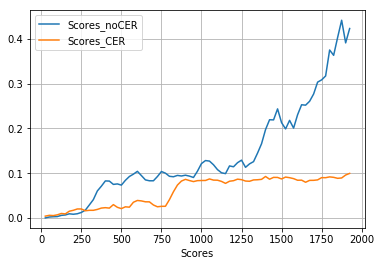

In [16]:
plt.plot(df['Episodes'], df['Scores_noCER'], label='Scores_noCER')
plt.plot(df['Episodes'], df['Scores_CER'], label='Scores_CER')
plt.xlabel('Episodes')
plt.xlabel('Scores')
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [ ]:
env.close()